# Question 1: Exploring World Happiness

In [2]:
import numpy as np      
import pandas as pd    
import matplotlib.pyplot as plt       
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
from sklearn.mixture import GaussianMixture

import os                  
import sys          

In [50]:
wh = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv")
wh6 = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv")
wh7 = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv")#Read the dataset
wh.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
wh100 = pd.get_dummies(wh, columns =[u'Country','Region'])
wh100.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,1,0,0,0,0


In [78]:
wh1000 = wh.drop(columns=['Country','Region'])
wh1000.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Basic Visualization

This is the heatmap of correlation among the variables. Through the heatmap, because lighter shade represents high correlation. We know that happiness has very high correlation with GDP per capita, famil and life expectancy. And it seems tiny correlation between happiness and generosity.

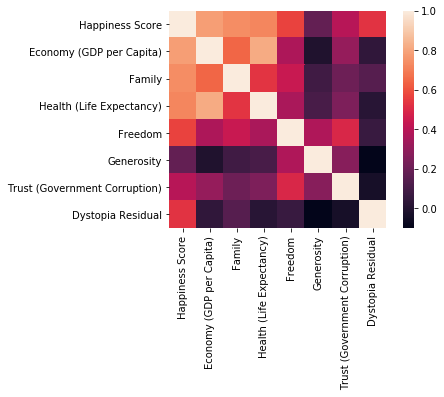

In [10]:
wh1 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

### Happiness score of countries in the world map: example for 2015

In [51]:
data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness Score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap1 = go.Figure(data = [data], layout=layout)
iplot(choromap1)

In [60]:
data = dict(type = 'choropleth', 
           locations = wh6['Country'],
           locationmode = 'country names',
           z = wh6['Happiness Score'], 
           text = wh6['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2016', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap2 = go.Figure(data = [data], layout=layout)
iplot(choromap2)

In [62]:
data = dict(type = 'choropleth', 
           locations = wh7['Country'],
           locationmode = 'country names',
           z = wh7['Happiness.Score'], 
           text = wh7['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## Principle Component Analysis

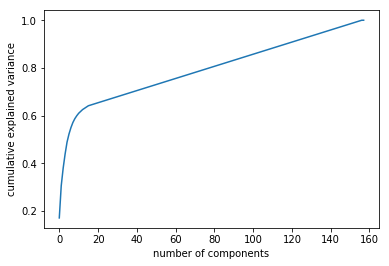

In [57]:
from sklearn.decomposition import PCA

X = wh100.drop([u'Happiness Rank','Happiness Score','Standard Error'], axis=1)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Clustering of Countries

## (1) k-means clustering

K-means is simple for the first choice. Firstly, we should define the number of clusters. The clusters are formed based on the clossness to the center value of the clusters.

The optimal number of neighbors is 2


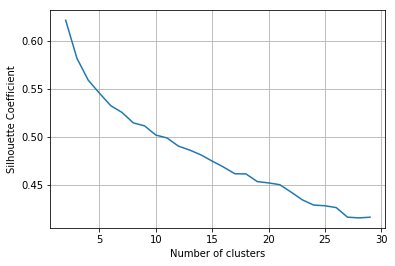

In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 30)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(wh1000)
    scores.append(metrics.silhouette_score(wh1000, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Plot the cluster obtained using k means

In [15]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

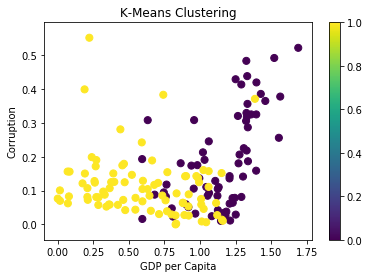

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## (2) Hierarchical clustering

Well, it also known as Hierarchical clustering. Actually it does not require us to specify the number of clusters.

In [38]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh100, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

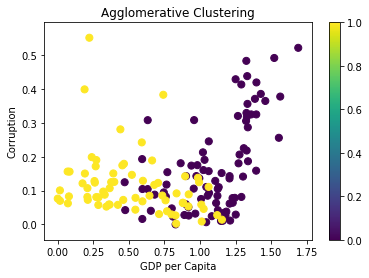

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## (3) Affinity Propagation

It does not require the number of cluster.

In [41]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh100)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

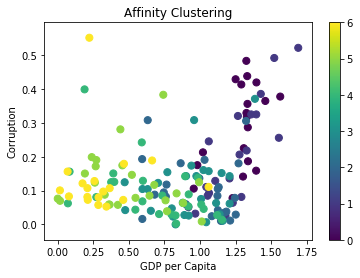

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## (4) Guassian Mixture Modelling

In [18]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)

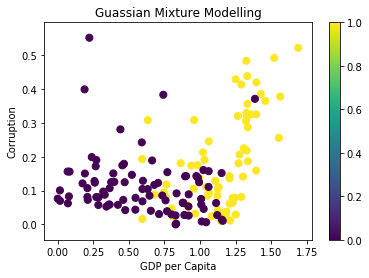

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=gmm[0],s=50)
ax.set_title('Guassian Mixture Modelling')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

# Questions:

#### 1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017

In a way, the answer is Yes. Through 156 comparable countries or regions, Norway ranks top 5 in these 3 years. Though people might say it's not the toppest happiness country during 2015 and 2016, it's a kind of happiness country when it keeps its ranking.

#### 2) All top ten countries rank highly on all the main features found to support happiness

It need to define what are the main features. I have no idea that how people calculate the index of happiness, but I believe the index of happiness will based on the features in the table. And as we see in the heatmap, happiness have a highly correlation with GDP per capita, famil and life expectancy. And it has tiny correlation between happiness and generosity. Therefore, if we define main features are GDP per capita, famil and life expectancy, I will say the answer is yes.

#### 3) Happiness is both social and personal

Yes, the happiness is influenced by family, liviing condition as well as economic.

#### 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness

No features about employment. But economic do affect a lot on happiness

#### 5) China are no happier than most countries, though richer and longer longevity

No. Both Hong Kong and Taiwan rank highly in about 160 countries and regions.

#### 6) Much of Africa is struggling

Yes, the happiness index is light in the index map of 2015,2016 and 2017

#### 7) Happiness has fallen in America

Well, from the table of these three years, if we look the ranking of those countries, United States rank nearly 15 in these 3 years. I have to say there is almost no change for United Sates. But for the index of happiness, it's a trend that United States' Score is decreasing.